AIE23119 N.sathwika
Question 1)

In [1]:
import numpy as np
from scipy.stats import entropy

def calculate_entropy(data):
    # Step 1: Create equal-width bins (4 bins)
    bin_edges = np.linspace(min(data), max(data), num=5)  # 4 bins → 5 edges
    binned_data = np.digitize(data, bins=bin_edges, right=False)

    # Step 2: Compute probabilities of each bin
    unique, counts = np.unique(binned_data, return_counts=True)
    probabilities = counts / len(data)

    # Step 3: Compute entropy
    return -np.sum(probabilities * np.log2(probabilities))

# Example usage
data = np.array([3.2, 4.5, 5.1, 6.7, 7.8, 8.5, 9.3, 10.2, 11.5, 12.0])  # Sample continuous data
entropy_value = calculate_entropy(data)
print(f"Entropy: {entropy_value}")


Entropy: 2.1709505944546685


Question 2)

In [2]:
import numpy as np

def gini_index(labels):
    """
    Compute the Gini index for a set of class labels.
    :param labels: List or numpy array of class labels.
    :return: Gini index value.
    """
    _, counts = np.unique(labels, return_counts=True)
    probabilities = counts / len(labels)
    gini = 1 - np.sum(probabilities ** 2)
    return gini

# Example usage
labels = np.array(["A", "A", "B", "B", "B", "C", "C", "C", "C", "C"])
gini_value = gini_index(labels)
print(f"Gini Index: {gini_value:.4f}")


Gini Index: 0.6200


Question 3) & 4)

In [3]:
from collections import Counter

def entropy(labels):
    """Calculate entropy for a given set of class labels."""
    _, counts = np.unique(labels, return_counts=True)
    probabilities = counts / len(labels)
    return -np.sum(probabilities * np.log2(probabilities))

def information_gain(data, labels, feature_index, bins=4):
    """Compute information gain for a given feature."""
    feature_values = data[:, feature_index]
    bin_edges = np.linspace(min(feature_values), max(feature_values), bins + 1)
    binned_feature = np.digitize(feature_values, bins=bin_edges, right=False)

    # Calculate parent entropy
    parent_entropy = entropy(labels)
    
    # Calculate weighted entropy for child nodes
    total_samples = len(labels)
    weighted_entropy = 0
    for value in np.unique(binned_feature):
        subset_labels = labels[binned_feature == value]
        weighted_entropy += (len(subset_labels) / total_samples) * entropy(subset_labels)
    
    return parent_entropy - weighted_entropy

# Example usage
data = np.array([[5.1, 3.5], [4.9, 3.0], [7.0, 3.2], [6.4, 3.2], [5.9, 3.0]])  # Features
labels = np.array(["A", "A", "B", "B", "B"])  # Class labels
info_gain = information_gain(data, labels, feature_index=0, bins=4)
print(f"Information Gain: {info_gain:.4f}")


Information Gain: 0.9710


Question 5)

In [4]:
class Node:
    """Decision Tree Node"""
    def __init__(self, feature=None, threshold=None, left=None, right=None, label=None):
        self.feature = feature
        self.threshold = threshold
        self.left = left
        self.right = right
        self.label = label

def build_tree(data, labels, depth=0):
    """Recursively builds a Decision Tree based on Information Gain"""
    if len(set(labels)) == 1:  # If pure class
        return Node(label=labels[0])
    
    best_feature = max(range(data.shape[1]), key=lambda i: information_gain(data, labels, i, bins=4))
    bin_edges = np.linspace(min(data[:, best_feature]), max(data[:, best_feature]), num=5)
    
    left_indices = data[:, best_feature] <= bin_edges[2]
    right_indices = data[:, best_feature] > bin_edges[2]
    
    return Node(
        feature=best_feature,
        threshold=bin_edges[2],
        left=build_tree(data[left_indices], labels[left_indices], depth+1),
        right=build_tree(data[right_indices], labels[right_indices], depth+1),
    )

# Build a simple tree
tree = build_tree(data, labels)
print(f"Root Feature: {tree.feature}, Threshold: {tree.threshold}")


Root Feature: 0, Threshold: 5.95


Question 6)

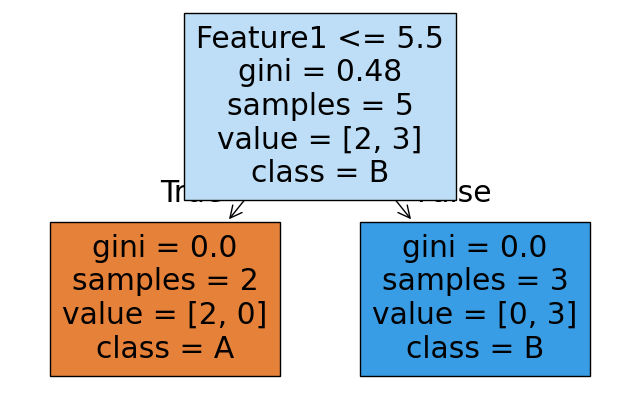

In [5]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt

clf = DecisionTreeClassifier()
clf.fit(data, labels)

plt.figure(figsize=(8, 5))
tree.plot_tree(clf, filled=True, feature_names=["Feature1", "Feature2"], class_names=np.unique(labels))
plt.show()


Question 7)

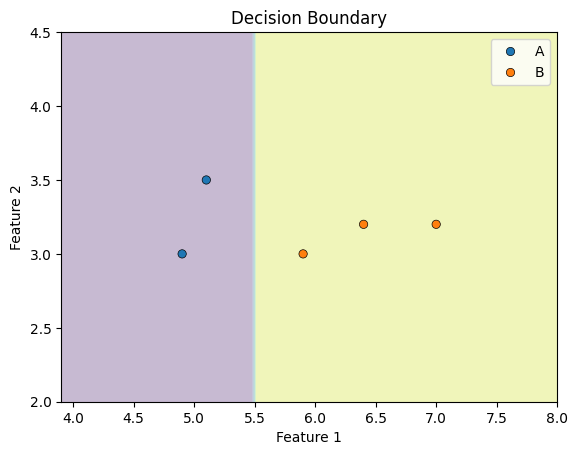

In [7]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def plot_decision_boundary(clf, X, y):
    # Convert categorical labels to numeric
    from sklearn.preprocessing import LabelEncoder
    label_encoder = LabelEncoder()
    y_numeric = label_encoder.fit_transform(y)  # Convert class labels to numbers

    # Create mesh grid
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))

    # Predict over the mesh grid
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = label_encoder.transform(Z)  # Convert predicted labels to numeric
    Z = Z.reshape(xx.shape)

    # Plot decision boundary
    plt.contourf(xx, yy, Z, alpha=0.3)
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, edgecolor="k")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.title("Decision Boundary")
    plt.show()

# Call the function
plot_decision_boundary(clf, data, labels)
